In [1]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

In [2]:
df = pd.read_csv('household_power_consumption (Comma).csv')
#df = pd.read_table('Data\Sceaux France\household_power_consumption.txt', ';')
#X, y = make_regression(n_samples=10000, n_features=10)
df = df.replace(['Null', '?', 'NaN'],'0')
df = df.dropna()

In [3]:
label_encoder = LabelEncoder()
df['Date'] = label_encoder.fit_transform(df['Date'])
df['Time'] = label_encoder.fit_transform(df['Time'])
df=df.drop(['Time'], axis=1)

total = df.iloc


df=df.astype(float)
df=df.groupby('Date',as_index =False, sort=False).sum()

In [4]:
df['y'] = df.iloc[:,-3:].astype(float).sum(axis=1)
#♦df.drop(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1)
df = df[df.y != 0]
y = df['y']
X = df.iloc[:,:-4]


Q1 = np.quantile(y, 0.25)
Q3 = np.quantile(y, 0.75)

print(Q1)
print(Q3)


8690.75
15980.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)#scaling our training data
X_test = scaler.transform(X_test)#transform data zodat mean = 0 & standard diviation = 1
y_train = scale(y_train)
y_test = scale(y_test)


lsvr = LinearSVR(max_iter=100000)
#print(lsvr)

lsvr.fit(X_train, y_train)

score = lsvr.score(X_train, y_train)
print("R-squared:", score)#

cv_score = cross_val_score(lsvr, X_train, y_train)
print("CV mean score: ", cv_score.mean())

y_pred = lsvr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", mse*(1/2.0))

R-squared: 0.7289166637662738
CV mean score:  0.7217913452817649
MSE:  0.27837467246385256
MAE:  0.3589678752322373
RMSE:  0.13918733623192628


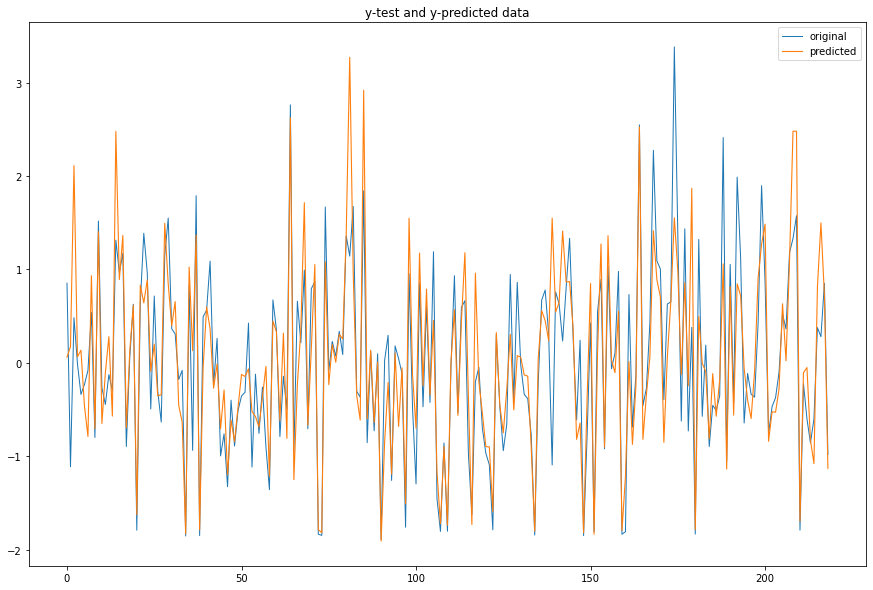

In [6]:
X_ax = range(len(y_test))
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(X_ax, y_test, linewidth=1, label="original")
plt.plot(X_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.legend()
plt.show()
